# Read Astropy tables on PSF

- creation June 30th 2016
- author Sylvie Dagoret-Campagne
- Update July 6th 2016


In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits

from astropy.table import Table
from astropy.table import Column

import pandas as pd

In [36]:
intputtablefile1='HD163466_y3_1-10_TablePSF.fits'

In [37]:
 t1 = Table.read(intputtablefile1)

In [38]:
t1

num,file,time,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy
int32,str26,str23,float64,int32,float64,float64,float64,float64
0,AssScImHD163466_y3_1.fits,2016-05-10T08:31:46.221,1.0,7,3.14462939981,3.41466663301,0.0624903435569,0.0399877500438
1,AssScImHD163466_y3_2.fits,2016-05-10T08:33:17.773,5.0,23,3.23590764548,3.67168661807,0.210812621801,0.313203469327
2,AssScImHD163466_y3_3.fits,2016-05-10T08:33:27.174,5.0,30,3.28439425917,3.44808452428,0.153086049741,0.109240066938
3,AssScImHD163466_y3_4.fits,2016-05-10T08:33:36.166,5.0,29,3.07852576115,3.39865028239,0.0743265241544,0.182716405574
4,AssScImHD163466_y3_5.fits,2016-05-10T08:38:53.776,3.0,9,5.01067679435,5.12760526598,0.431963018433,0.931127413941
5,AssScImHD163466_y3_6.fits,2016-05-10T08:39:35.943,3.0,4,3.66881377389,3.71438578859,0.125757386795,0.0576096104765
6,AssScImHD163466_y3_7.fits,2016-05-10T08:40:17.637,3.0,15,2.62049631174,2.75934903687,0.053654463766,0.0477390482732
7,AssScImHD163466_y3_8.fits,2016-05-10T08:41:40.854,3.0,12,3.02620244552,2.97225160347,0.0890701171525,0.163930894688
8,AssScImHD163466_y3_9.fits,2016-05-10T08:41:47.875,3.0,15,2.85053312944,2.90077455,0.076245483463,0.038651577062


In [39]:
df1=t1.to_pandas()

In [40]:
df1.describe() # pandas able to show statistics

,num,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,4.50000,3.400000,16.400000,3.266613,3.427067,0.137860,0.195532
std,3.02765,1.264911,8.946756,0.681054,0.689866,0.113786,0.272582
min,0.00000,1.000000,4.000000,2.620496,2.759349,0.053654,0.038652
25%,2.25000,3.000000,9.750000,2.894450,2.918644,0.074806,0.050207
50%,4.50000,3.000000,15.000000,3.111578,3.406658,0.095132,0.090178
75%,6.75000,4.500000,22.250000,3.272273,3.615786,0.146254,0.178020
max,9.00000,5.000000,30.000000,5.010677,5.127605,0.431963,0.931127


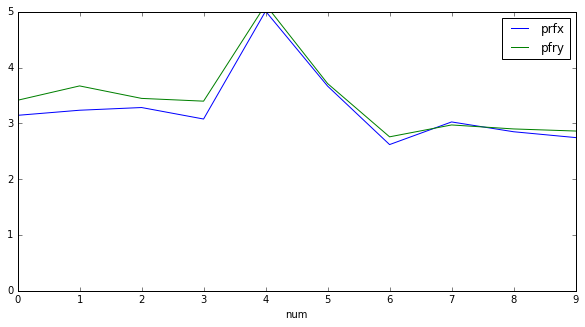

In [41]:
plt.figure(figsize=(10,6))
df1_2=df1[['num', 'prfx','pfry']]
df1_2.plot('num',['prfx','pfry'],ylim=(0.,5.),figsize=(10,5))
plt.legend(loc='upper right')
plt.show()

In [42]:
df1_no_missing = df1.dropna()

In [43]:
df1_no_missing.describe()

,num,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,4.50000,3.400000,16.400000,3.266613,3.427067,0.137860,0.195532
std,3.02765,1.264911,8.946756,0.681054,0.689866,0.113786,0.272582
min,0.00000,1.000000,4.000000,2.620496,2.759349,0.053654,0.038652
25%,2.25000,3.000000,9.750000,2.894450,2.918644,0.074806,0.050207
50%,4.50000,3.000000,15.000000,3.111578,3.406658,0.095132,0.090178
75%,6.75000,4.500000,22.250000,3.272273,3.615786,0.146254,0.178020
max,9.00000,5.000000,30.000000,5.010677,5.127605,0.431963,0.931127


## Now use the number in the filename to overwrite the num

In [44]:
import re  # use regular expression to extract the file number

In [45]:
filenames_df1=df1['file']

In [46]:
NB_OF_FILES_df1=len(filenames_df1)

In [47]:
filenumber_df1=np.zeros(NB_OF_FILES_df1,dtype='i4')

In [48]:
for id,file in enumerate(filenames_df1):
    filenumber_df1[id]=int( re.findall('^AssScImHD163466_y3_([0-9]+)',file)[0])

In [49]:
filenumber_df1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int32)

In [50]:
df1_3=df1

In [51]:
df1_3['num']=filenumber_df1

In [52]:
df1_3

,num,file,time,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy
0,1,AssScImHD163466_y3_1.fits,2016-05-10T08:31:46.221,1.0,7,3.144629,3.414667,0.062490,0.039988
1,2,AssScImHD163466_y3_2.fits,2016-05-10T08:33:17.773,5.0,23,3.235908,3.671687,0.210813,0.313203
2,3,AssScImHD163466_y3_3.fits,2016-05-10T08:33:27.174,5.0,30,3.284394,3.448085,0.153086,0.109240
3,4,AssScImHD163466_y3_4.fits,2016-05-10T08:33:36.166,5.0,29,3.078526,3.398650,0.074327,0.182716
4,5,AssScImHD163466_y3_5.fits,2016-05-10T08:38:53.776,3.0,9,5.010677,5.127605,0.431963,0.931127
5,6,AssScImHD163466_y3_6.fits,2016-05-10T08:39:35.943,3.0,4,3.668814,3.714386,0.125757,0.057610
6,7,AssScImHD163466_y3_7.fits,2016-05-10T08:40:17.637,3.0,15,2.620496,2.759349,0.053654,0.047739
7,8,AssScImHD163466_y3_8.fits,2016-05-10T08:41:40.854,3.0,12,3.026202,2.972252,0.089070,0.163931
8,9,AssScImHD163466_y3_9.fits,2016-05-10T08:41:47.875,3.0,15,2.850533,2.900775,0.076245,0.038652
9,10,AssScImHD163466_y3_10.fits,2016-05-10T08:41:54.822,3.0,20,2.745952,2.863218,0.101194,0.071117


In [53]:
full_dataset=df1_3

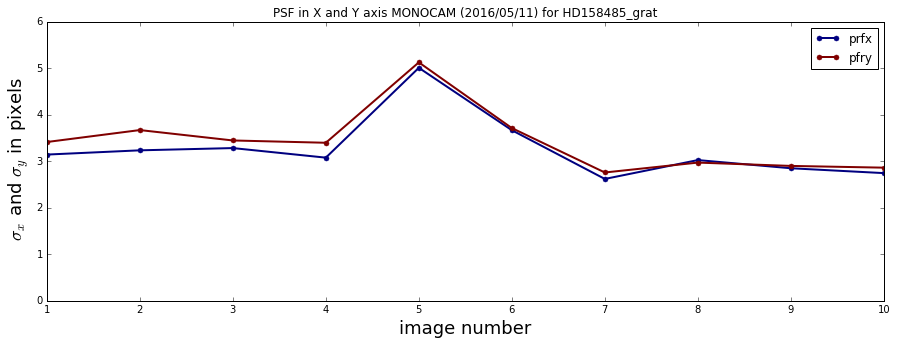

In [54]:
fig = plt.figure()
full_dataset_2=full_dataset[['num', 'prfx','pfry']]
ax=full_dataset_2.plot('num',['prfx','pfry'],lw=2,colormap='jet',marker='.',markersize=10,title='PSF in X and Y axis MONOCAM (2016/05/11) for HD158485_grat',ylim=(0.,6.),figsize=(15,5))
ax.set_xlabel("image number",fontsize=18)
ax.set_ylabel(" $\sigma_x$ and $\sigma_y$ in pixels",fontsize=18)
title='PSF in X and Y axis MONOCAM (2016/05/09) for HD163466_y3'
fig.suptitle(title, fontsize=20)
plt.legend(loc='upper right')

fig.savefig('PRFXY_HD163466_y3_20160509.jpg')
plt.show()  # pandas able to remove NaN



In [55]:
PixToArcsec=0.944

In [56]:
sigmax=full_dataset['prfx']*PixToArcsec

In [57]:
series_sigmax=pd.Series(sigmax)

In [58]:
sigmay=full_dataset['pfry']*PixToArcsec

In [59]:
series_sigmay=pd.Series(sigmay)

In [60]:
full_dataset

,num,file,time,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy
0,1,AssScImHD163466_y3_1.fits,2016-05-10T08:31:46.221,1.0,7,3.144629,3.414667,0.062490,0.039988
1,2,AssScImHD163466_y3_2.fits,2016-05-10T08:33:17.773,5.0,23,3.235908,3.671687,0.210813,0.313203
2,3,AssScImHD163466_y3_3.fits,2016-05-10T08:33:27.174,5.0,30,3.284394,3.448085,0.153086,0.109240
3,4,AssScImHD163466_y3_4.fits,2016-05-10T08:33:36.166,5.0,29,3.078526,3.398650,0.074327,0.182716
4,5,AssScImHD163466_y3_5.fits,2016-05-10T08:38:53.776,3.0,9,5.010677,5.127605,0.431963,0.931127
5,6,AssScImHD163466_y3_6.fits,2016-05-10T08:39:35.943,3.0,4,3.668814,3.714386,0.125757,0.057610
6,7,AssScImHD163466_y3_7.fits,2016-05-10T08:40:17.637,3.0,15,2.620496,2.759349,0.053654,0.047739
7,8,AssScImHD163466_y3_8.fits,2016-05-10T08:41:40.854,3.0,12,3.026202,2.972252,0.089070,0.163931
8,9,AssScImHD163466_y3_9.fits,2016-05-10T08:41:47.875,3.0,15,2.850533,2.900775,0.076245,0.038652
9,10,AssScImHD163466_y3_10.fits,2016-05-10T08:41:54.822,3.0,20,2.745952,2.863218,0.101194,0.071117


### simply add series as columns in the dataset

In [61]:
full_dataset['sigmax'] = series_sigmax

In [62]:
full_dataset['sigmay'] = series_sigmay

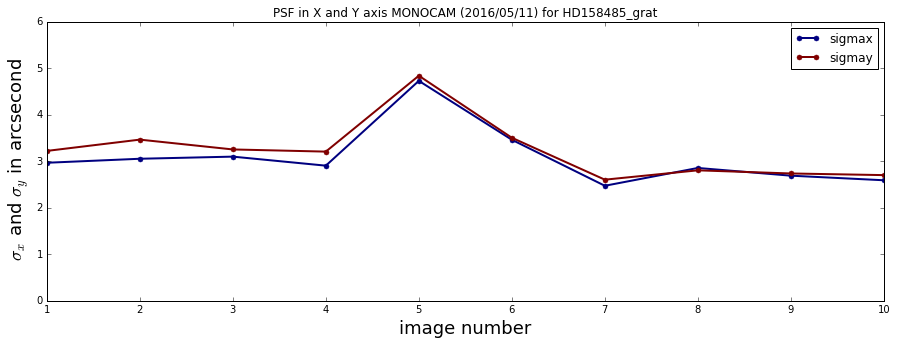

In [63]:
fig = plt.figure()
full_dataset_3=full_dataset[['num', 'sigmax','sigmay']]
ax=full_dataset_3.plot('num',['sigmax','sigmay'],lw=2,colormap='jet',marker='.',markersize=10,title='PSF in X and Y axis MONOCAM (2016/05/11) for HD158485_grat',ylim=(0.,6.),figsize=(15,5))
ax.set_xlabel("image number",fontsize=18)
ax.set_ylabel(" $\sigma_x$ and $\sigma_y$ in arcsecond",fontsize=18)
title='PSF in X and Y axis MONOCAM (2016/05/09) for HD163466_y3'
fig.suptitle(title, fontsize=20)
plt.legend(loc='upper right')
plt.show()  # pandas able to remove NaN
fig.savefig('PSFXY_HD163466_y3_20160509.jpg')

In [64]:
output_table=Table.from_pandas(full_dataset)

In [65]:
output_table

num,file,time,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy,sigmax,sigmay
int32,str26,str23,float64,int32,float64,float64,float64,float64,float64,float64
1,AssScImHD163466_y3_1.fits,2016-05-10T08:31:46.221,1.0,7,3.14462939981,3.41466663301,0.0624903435569,0.0399877500438,2.96853015342,3.22344530156
2,AssScImHD163466_y3_2.fits,2016-05-10T08:33:17.773,5.0,23,3.23590764548,3.67168661807,0.210812621801,0.313203469327,3.05469681733,3.46607216746
3,AssScImHD163466_y3_3.fits,2016-05-10T08:33:27.174,5.0,30,3.28439425917,3.44808452428,0.153086049741,0.109240066938,3.10046818065,3.25499179092
4,AssScImHD163466_y3_4.fits,2016-05-10T08:33:36.166,5.0,29,3.07852576115,3.39865028239,0.0743265241544,0.182716405574,2.90612831853,3.20832586658
5,AssScImHD163466_y3_5.fits,2016-05-10T08:38:53.776,3.0,9,5.01067679435,5.12760526598,0.431963018433,0.931127413941,4.73007889387,4.84045937108
6,AssScImHD163466_y3_6.fits,2016-05-10T08:39:35.943,3.0,4,3.66881377389,3.71438578859,0.125757386795,0.0576096104765,3.46336020256,3.50638018443
7,AssScImHD163466_y3_7.fits,2016-05-10T08:40:17.637,3.0,15,2.62049631174,2.75934903687,0.053654463766,0.0477390482732,2.47374851828,2.60482549081
8,AssScImHD163466_y3_8.fits,2016-05-10T08:41:40.854,3.0,12,3.02620244552,2.97225160347,0.0890701171525,0.163930894688,2.85673510857,2.80580551367
9,AssScImHD163466_y3_9.fits,2016-05-10T08:41:47.875,3.0,15,2.85053312944,2.90077455,0.076245483463,0.038651577062,2.69090327419,2.7383311752


In [68]:
outputtablefile='HD163466_y3_1-10_TablePSF_night20160509.fits'
output_table.write(outputtablefile,format='fits')

TypeError: write_table_fits() got an unexpected keyword argument 'clober'

In [ ]:
t2 = Table.read(outputtablefile)

In [ ]:
t2